In [1]:
import pandas as pd
import numpy as np

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import autocorrelation_plot

# Machine Learning Phase
import sklearn 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


#Metrics Libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv('UCI_Credit_Card.csv')

In [3]:
summary_result=[]

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
df=df.rename(columns = {'PAY_0':'PAY_1'})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_1                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [7]:
categorical_features = [
    'SEX',
    'EDUCATION',
    'MARRIAGE',
    'PAY_1',
    'PAY_2',
    'PAY_3',
    'PAY_4',
    'PAY_5',
    'PAY_6',
    'default.payment.next.month'
]

df[categorical_features].describe()

,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,0.221200
std,0.489129,0.790349,0.521970,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,0.415062
min,1.000000,0.000000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000
25%,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,6.000000,3.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1.000000


In [8]:
# Fixing marriage
df['MARRIAGE'] = df['MARRIAGE'].apply(lambda x: 3 if x == 0 else x)

# Fixing education
df['EDUCATION'] = df['EDUCATION'].apply(lambda x: 4 if x in [0, 5, 6] else x)

df[categorical_features].describe()

,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,1.603733,1.842267,1.557267,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,0.221200
std,0.489129,0.744494,0.521405,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,0.415062
min,1.000000,1.000000,1.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000
25%,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,4.000000,3.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1.000000


In [9]:
default_baseline = len(df[df['default.payment.next.month'] == 1]) / len(df) * 100

In [10]:
numerical_features = [
    'LIMIT_BAL', 
    'AGE', 
    'BILL_AMT1', 
    'BILL_AMT2', 
    'BILL_AMT3', 
    'BILL_AMT4', 
    'BILL_AMT5', 
    'BILL_AMT6', 
    'PAY_AMT1', 
    'PAY_AMT2', 
    'PAY_AMT3', 
    'PAY_AMT4', 
    'PAY_AMT5', 
    'PAY_AMT6'
]

df[numerical_features].describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [11]:
# Payment-to-charge ratio
pay_amtcols = ['PAY_AMT{}'.format(x) for x in range(1,7)]
billcols = ['BILL_AMT{}'.format(x) for x in range(1,7)]

df_pmts = df[pay_amtcols]
df_bills = df[billcols]

pay_sums = df_pmts.sum(axis=1)
bill_sums = df_bills.sum(axis=1)

# To avoid division by 0
bill_sums[bill_sums == 0] = 1
pay_sums[bill_sums == 1] = 1

df['PAYMENT_TO_CHARGES_RATIO'] = pay_sums / bill_sums
numerical_features.append('PAYMENT_TO_CHARGES_RATIO')

In [12]:
# Bill_to_balance ratio
bill_avgs = df_bills.mean(axis=1)

df['BILL_TO_BALANCE'] = bill_avgs / df['LIMIT_BAL']
numerical_features.append('BILL_TO_BALANCE')

In [13]:
paycols = ['PAY_{}'.format(x) for x in range(1,7)]
paycols_df = df[paycols]
for PAY_X in paycols:
  paycols_df[PAY_X] = paycols_df[PAY_X].apply(lambda x: 1 if x in [-2, -1, 0] else 0)
df['TOTAL_PAID_ON_TIME'] = paycols_df.sum(axis=1)
numerical_features.append('TOTAL_PAID_ON_TIME')

/Users/rayhan/opt/anaconda3/envs/coms572/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


TOTAL_PAID_ON_TIME   
0                   1    70.320656
1                   1    57.382550
2                   1    57.308097
3                   1    50.866551
4                   1    38.757241
5                   1    29.823769
6                   1    11.710401
Name: default.payment.next.month, dtype: float64


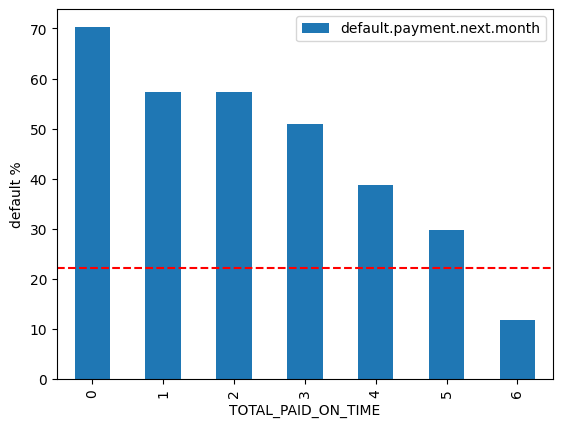

In [14]:
val_counts = df.groupby('TOTAL_PAID_ON_TIME')['default.payment.next.month'].apply(lambda group: group.value_counts() / len(group) * 100)
print(val_counts[val_counts.index.get_level_values(1) == 1])
val_counts[val_counts.index \
           .get_level_values(1) == 1] \
           .reset_index(level=1) \
           .drop(columns='level_1') \
           .plot(kind='bar', ylabel='default %');
plt.axhline(y=default_baseline, color='r', linestyle='--');

In [15]:
# The last bill to balance ratio might be interesting since it's the last before prediction.
df['LAST_BILL_TO_BALANCE'] = df['BILL_AMT1'] / df['LIMIT_BAL']
numerical_features.append('LAST_BILL_TO_BALANCE')

In [16]:
# last_bill_to_bal_bins = np.arange(df['LAST_BILL_TO_BALANCE'].max() + 1).tolist()
# last_bill_to_bal_bins.insert(0, df['LAST_BILL_TO_BALANCE'].min()) 
# df_copy['LAST_BILL_TO_BALANCE'] = pd.cut(df['LAST_BILL_TO_BALANCE'], last_bill_to_bal_bins)
# val_counts = df_copy.groupby('LAST_BILL_TO_BALANCE')['default.payment.next.month'].apply(lambda group: group.value_counts() / len(group) * 100)
# print(val_counts[val_counts.index.get_level_values(1) == 1])
# val_counts[val_counts.index \
#            .get_level_values(1) == 1] \
#            .reset_index(level=1) \
#            .drop(columns='level_1') \
#            .plot(kind='bar', ylabel='default %');
# plt.axhline(y=default_baseline, color='r', linestyle='--');

In [17]:
# If someone busted its limit, they might be less able to pay back.
# df['BUSTED_LIMIT'] = df_copy['BUSTED_LIMIT']
# categorical_features.insert(0, 'BUSTED_LIMIT')

In [16]:
# 3 months average bill
three_months_bill_average = df[billcols[::-1]].rolling(3, axis=1, min_periods=1).mean()

bill_avg_cols_names = {}
for col_name in billcols:
  bill_avg_cols_names[col_name] = col_name + '_3m_avg'

three_months_bill_average = three_months_bill_average.rename(columns=bill_avg_cols_names)
three_months_bill_average = three_months_bill_average[three_months_bill_average.columns[::-1]] 
df = pd.concat([df, three_months_bill_average], axis=1)

In [17]:
# 3 months average payment to bill ratio
# Creating the average pay columns
three_months_pay_average = df[pay_amtcols[::-1]].rolling(3, axis=1, min_periods=1).mean()

pay_avg_cols_names = {}
for col_name in pay_amtcols:
  pay_avg_cols_names[col_name] = col_name + '_3m_avg'

three_months_pay_average = three_months_pay_average.rename(columns=pay_avg_cols_names)
three_months_pay_average = three_months_pay_average[three_months_pay_average.columns[::-1]] 
df = pd.concat([df, three_months_pay_average], axis=1)

In [18]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,PAYMENT_TO_CHARGES_RATIO,BILL_TO_BALANCE,TOTAL_PAID_ON_TIME,LAST_BILL_TO_BALANCE,BILL_AMT1_3m_avg,BILL_AMT2_3m_avg,BILL_AMT3_3m_avg,BILL_AMT4_3m_avg,BILL_AMT5_3m_avg,BILL_AMT6_3m_avg,PAY_AMT1_3m_avg,PAY_AMT2_3m_avg,PAY_AMT3_3m_avg,PAY_AMT4_3m_avg,PAY_AMT5_3m_avg,PAY_AMT6_3m_avg
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0.089434,0.064200,4,0.195650,2568.000000,1263.666667,229.666667,0.000000,0.0,0.0,229.666667,229.666667,0.000000,0.000000,0.0,0.0
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0.292791,0.023718,4,0.022350,2363.000000,2559.666667,3136.333333,3329.333333,3358.0,3261.0,666.666667,1000.000000,666.666667,1000.000000,1000.0,2000.0
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0.108388,0.188246,6,0.324878,18941.666667,13972.333333,14279.333333,14942.666667,15248.5,15549.0,1339.333333,1166.666667,1000.000000,2333.333333,3000.0,5000.0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0.036259,0.771113,6,0.939800,48171.333333,41946.000000,35521.333333,28940.000000,29253.0,29547.0,1739.666667,1439.666667,1123.000000,1056.333333,1034.5,1000.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0.540054,0.364463,6,0.172340,16707.333333,20815.000000,25307.000000,19739.000000,19138.5,19131.0,16227.000000,18560.333333,6563.000000,3456.000000,684.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,0.058661,0.549507,6,0.858855,196709.333333,163061.333333,109202.000000,45073.666667,23608.5,15980.0,11167.666667,9350.000000,4350.000000,3015.666667,3000.0,1000.0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,0.684071,0.023536,6,0.011220,2337.666667,4769.666667,5890.333333,4723.000000,2595.0,0.0,4787.000000,4217.666667,3042.333333,43.000000,0.0,0.0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,0.443997,0.391644,3,0.118833,3226.333333,8997.333333,14739.333333,20272.333333,19969.5,19357.0,7333.333333,8733.333333,9400.000000,3100.000000,2550.0,3100.0
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,0.552044,0.555440,5,-0.020563,51012.666667,69152.333333,46977.666667,37857.666667,30399.5,48944.0,30162.333333,2171.000000,18689.333333,18898.000000,27384.0,1804.0


In [19]:
df['payment_score']=df['PAY_1']+df['PAY_2']+df['PAY_3']+df['PAY_4']+df['PAY_5']+df['PAY_6']
df['bill_amt_score'] =df['payment_score']*df[['BILL_AMT1', 'BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].mean(axis=1)

In [20]:
df.apply(lambda x:sum(x.isnull()))

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
PAYMENT_TO_CHARGES_RATIO      0
BILL_TO_BALANCE               0
TOTAL_PAID_ON_TIME            0
LAST_BILL_TO_BALANCE          0
BILL_AMT1_3m_avg              0
BILL_AMT2_3m_avg              0
BILL_AMT

In [21]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month', 'PAYMENT_TO_CHARGES_RATIO',
       'BILL_TO_BALANCE', 'TOTAL_PAID_ON_TIME', 'LAST_BILL_TO_BALANCE',
       'BILL_AMT1_3m_avg', 'BILL_AMT2_3m_avg', 'BILL_AMT3_3m_avg',
       'BILL_AMT4_3m_avg', 'BILL_AMT5_3m_avg', 'BILL_AMT6_3m_avg',
       'PAY_AMT1_3m_avg', 'PAY_AMT2_3m_avg', 'PAY_AMT3_3m_avg',
       'PAY_AMT4_3m_avg', 'PAY_AMT5_3m_avg', 'PAY_AMT6_3m_avg',
       'payment_score', 'bill_amt_score'],
      dtype='object')

In [22]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.000000e+00,7500.750000,15000.500000,22500.250000,3.000000e+04
LIMIT_BAL,30000.0,167484.322667,129747.661567,1.000000e+04,50000.000000,140000.000000,240000.000000,1.000000e+06
SEX,30000.0,1.603733,0.489129,1.000000e+00,1.000000,2.000000,2.000000,2.000000e+00
EDUCATION,30000.0,1.842267,0.744494,1.000000e+00,1.000000,2.000000,2.000000,4.000000e+00
MARRIAGE,30000.0,1.557267,0.521405,1.000000e+00,1.000000,2.000000,2.000000,3.000000e+00
AGE,30000.0,35.485500,9.217904,2.100000e+01,28.000000,34.000000,41.000000,7.900000e+01
PAY_1,30000.0,-0.016700,1.123802,-2.000000e+00,-1.000000,0.000000,0.000000,8.000000e+00
PAY_2,30000.0,-0.133767,1.197186,-2.000000e+00,-1.000000,0.000000,0.000000,8.000000e+00
PAY_3,30000.0,-0.166200,1.196868,-2.000000e+00,-1.000000,0.000000,0.000000,8.000000e+00
PAY_4,30000.0,-0.220667,1.169139,-2.000000e+00,-1.000000,0.000000,0.000000,8.000000e+00


In [24]:
df=df.drop('ID', axis=1)
df=df.drop('SEX', axis=1)
df=df.drop('EDUCATION', axis=1)
df=df.drop('MARRIAGE', axis=1)
df=df.drop('AGE', axis=1)


In [25]:
df

,LIMIT_BAL,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,PAYMENT_TO_CHARGES_RATIO,BILL_TO_BALANCE,TOTAL_PAID_ON_TIME,LAST_BILL_TO_BALANCE,BILL_AMT1_3m_avg,BILL_AMT2_3m_avg,BILL_AMT3_3m_avg,BILL_AMT4_3m_avg,BILL_AMT5_3m_avg,BILL_AMT6_3m_avg,PAY_AMT1_3m_avg,PAY_AMT2_3m_avg,PAY_AMT3_3m_avg,PAY_AMT4_3m_avg,PAY_AMT5_3m_avg,PAY_AMT6_3m_avg,payment_score,bill_amt_score
0,20000.0,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0.089434,0.064200,4,0.195650,2568.000000,1263.666667,229.666667,0.000000,0.0,0.0,229.666667,229.666667,0.000000,0.000000,0.0,0.0,-2,-2568.000000
1,120000.0,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0.292791,0.023718,4,0.022350,2363.000000,2559.666667,3136.333333,3329.333333,3358.0,3261.0,666.666667,1000.000000,666.666667,1000.000000,1000.0,2000.0,3,8538.500000
2,90000.0,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0.108388,0.188246,6,0.324878,18941.666667,13972.333333,14279.333333,14942.666667,15248.5,15549.0,1339.333333,1166.666667,1000.000000,2333.333333,3000.0,5000.0,0,0.000000
3,50000.0,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0.036259,0.771113,6,0.939800,48171.333333,41946.000000,35521.333333,28940.000000,29253.0,29547.0,1739.666667,1439.666667,1123.000000,1056.333333,1034.5,1000.0,0,0.000000
4,50000.0,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0.540054,0.364463,6,0.172340,16707.333333,20815.000000,25307.000000,19739.000000,19138.5,19131.0,16227.000000,18560.333333,6563.000000,3456.000000,684.0,679.0,-2,-36446.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,0.058661,0.549507,6,0.858855,196709.333333,163061.333333,109202.000000,45073.666667,23608.5,15980.0,11167.666667,9350.000000,4350.000000,3015.666667,3000.0,1000.0,0,0.000000
29996,150000.0,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,0.684071,0.023536,6,0.011220,2337.666667,4769.666667,5890.333333,4723.000000,2595.0,0.0,4787.000000,4217.666667,3042.333333,43.000000,0.0,0.0,-4,-14121.333333
29997,30000.0,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,0.443997,0.391644,3,0.118833,3226.333333,8997.333333,14739.333333,20272.333333,19969.5,19357.0,7333.333333,8733.333333,9400.000000,3100.000000,2550.0,3100.0,8,93994.666667
29998,80000.0,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,0.552044,0.555440,5,-0.020563,51012.666667,69152.333333,46977.666667,37857.666667,30399.5,48944.0,30162.333333,2171.000000,18689.333333,18898.000000,27384.0,1804.0,-1,-44435.166667


# Data Processing and Normalization

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
scaled_features = scaler.transform(df)
df = pd.DataFrame(data=scaled_features, columns= df.columns.values)

In [28]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,0.159075,0.131058,0.0,0.040404,0.131313,0.232323,1.0
PAY_1,30000.0,0.198330,0.112380,0.0,0.100000,0.200000,0.200000,1.0
PAY_2,30000.0,0.186623,0.119719,0.0,0.100000,0.200000,0.200000,1.0
PAY_3,30000.0,0.183380,0.119687,0.0,0.100000,0.200000,0.200000,1.0
PAY_4,30000.0,0.177933,0.116914,0.0,0.100000,0.200000,0.200000,1.0
PAY_5,30000.0,0.173380,0.113319,0.0,0.100000,0.200000,0.200000,1.0
PAY_6,30000.0,0.170890,0.114999,0.0,0.100000,0.200000,0.200000,1.0
BILL_AMT1,30000.0,0.191846,0.065159,0.0,0.149668,0.166324,0.205887,1.0
BILL_AMT2,30000.0,0.112893,0.067546,0.0,0.069053,0.086340,0.126964,1.0
BILL_AMT3,30000.0,0.112157,0.038076,0.0,0.087808,0.097374,0.119378,1.0


In [29]:
from scipy.stats import pearsonr

In [30]:
for eachValue in df.columns:    
    corr, _ = pearsonr(df[eachValue], df['default.payment.next.month'])
    print('{0} : {1}'.format( eachValue, corr))

LIMIT_BAL : -0.15351987639350734
PAY_1 : 0.32479372847862165
PAY_2 : 0.26355120167216517
PAY_3 : 0.235252513724916
PAY_4 : 0.21661363684242416
PAY_5 : 0.20414891387616643
PAY_6 : 0.186866361653545
BILL_AMT1 : -0.01964419714322153
BILL_AMT2 : -0.014193218088215718
BILL_AMT3 : -0.01407551804321477
BILL_AMT4 : -0.01015649588028968
BILL_AMT5 : -0.006760463841014732
BILL_AMT6 : -0.005372314914815517
PAY_AMT1 : -0.07292948777785137
PAY_AMT2 : -0.05857870658290093
PAY_AMT3 : -0.05625035099033113
PAY_AMT4 : -0.05682740089288762
PAY_AMT5 : -0.05512351562108842
PAY_AMT6 : -0.05318334032612805
default.payment.next.month : 0.9999999999999967
PAYMENT_TO_CHARGES_RATIO : -0.010352512236293665
BILL_TO_BALANCE : 0.11548285326428645
TOTAL_PAID_ON_TIME : -0.3983943599267232
LAST_BILL_TO_BALANCE : 0.08616810335391434
BILL_AMT1_3m_avg : -0.016450124566732748
BILL_AMT2_3m_avg : -0.013265807111371932
BILL_AMT3_3m_avg : -0.010800208100701494
BILL_AMT4_3m_avg : -0.007680061921085669
BILL_AMT5_3m_avg : -0.00615

In [31]:
new_df=df.copy()

In [32]:
y_original=new_df['default.payment.next.month']
X_original=new_df.drop('default.payment.next.month', axis=1)

In [33]:
X, x_test, y,y_test=train_test_split(X_original,y_original,test_size=0.2)

In [34]:
test_df=x_test
test_df['default.payment.next.month']=y_test

new_df=X
new_df['default.payment.next.month']=y

test_df=test_df.sample(frac=1).reset_index(drop=True)
new_df=new_df.sample(frac=1).reset_index(drop=True)

test_df['default.payment.next.month'].value_counts()
X = new_df.drop('default.payment.next.month',axis=1)
y = new_df['default.payment.next.month']

new_df['default.payment.next.month'].value_counts()

0.0    18687
1.0     5313
Name: default.payment.next.month, dtype: int64

In [35]:
X_test = test_df.drop('default.payment.next.month',axis=1)
y_test = test_df['default.payment.next.month']

# dataset shrinking... 

In [36]:
# correlated_data=df.copy()

In [37]:
# for eachValue in df.columns:    
#     corr, _ = pearsonr(df[eachValue], df['default.payment.next.month'])
#     if corr < 0:
#         correlated_data.drop(columns=eachValue,  axis=1)

# y_original=correlated_data['default.payment.next.month']
# X_original=correlated_data.drop('default.payment.next.month', axis=1)
# X, x_test, y,y_test=train_test_split(X_original,y_original,test_size=0.2)
# test_df=x_test
# test_df['default.payment.next.month']=y_test

# new_df=X
# new_df['default.payment.next.month']=y

# test_df=test_df.sample(frac=1).reset_index(drop=True)
# new_df=new_df.sample(frac=1).reset_index(drop=True)

# test_df['default.payment.next.month'].value_counts()
# X = new_df.drop('default.payment.next.month',axis=1)
# y = new_df['default.payment.next.month']

# new_df['default.payment.next.month'].value_counts()
    

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler

In [39]:
n_splits=5
kf=KFold(n_splits=n_splits, random_state=None, shuffle=False)

In [40]:
def k_fold_cross_validated_score(model,X,y):
    best_model=''
    best_accuracy=0
    average_accuracy=0
    scores=cross_val_score(model, X, y, cv=10 )
    best_accuracy=scores.max()
    average_accuracy=scores.mean()
    return best_model, best_accuracy, average_accuracy

# Logistic Regression

In [41]:
model=LogisticRegression()

In [42]:
k_fold_cross_validated_score(model, X, y)

/Users/rayhan/opt/anaconda3/envs/coms572/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/rayhan/opt/anaconda3/envs/coms572/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lea

('', 0.8154166666666667, 0.8085833333333335)

In [43]:
def k_fold_cross_validated_result(model):
    best_model=''
    best_accuracy=0
    average_accuracy=0
    acc_score=[]
    
    for train_index, test_index in kf.split(X):
        x_train, x_heldout=X.iloc[train_index, : ], X.iloc[test_index, :]
        y_train, y_heldout=y[train_index], y[test_index]
        model.fit(x_train, y_train)
        pred_values = model.predict(x_heldout)
        
        acc = accuracy_score(pred_values, y_heldout)
        if acc > best_accuracy:
            best_accuracy=acc
            best_model=model
        acc_score.append(acc)
    average_accuracy=sum(acc_score)/len(acc_score)

    return best_model, best_accuracy, average_accuracy

In [44]:
m, best_acc, avg_acc=k_fold_cross_validated_result(model)

print('Model : {0}, best Accuracy : {1}, Average Accuracy : {2}'.format(m, best_acc, avg_acc))

/Users/rayhan/opt/anaconda3/envs/coms572/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/rayhan/opt/anaconda3/envs/coms572/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lea

Model : LogisticRegression(), best Accuracy : 0.8127083333333334, Average Accuracy : 0.8083750000000001


/Users/rayhan/opt/anaconda3/envs/coms572/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [45]:
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)
print ("training average accuracy: {0}, training best accuracy: {1},  test accuracy : {2} ".format( avg_acc, best_acc, accuracy))

training average accuracy: 0.8083750000000001, training best accuracy: 0.8127083333333334,  test accuracy : 0.8098333333333333 


In [46]:
from sklearn.metrics import roc_curve, auc

In [47]:
def isAvailableToadd(item , list):
    flag=False 
    if len(list)==0:
        return flag

    for ele in list:
        if ele['model']==item['model']:
            flag=True 
    return flag


In [48]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
item ={'model':'Logistic Regression',
'false_positive_rate':false_positive_rate, 
'true_positive_rate':true_positive_rate, 
'roc_auc':roc_auc,
'best_train_accuracy':best_acc, 
'average_train_accuracy':avg_acc,
'test_accuracy':accuracy 
}

if not isAvailableToadd(item, summary_result):
    summary_result.append(item)

# Linear Perceptron

In [49]:
from sklearn.linear_model import Perceptron
model=Perceptron()
m, best_acc, avg_acc= k_fold_cross_validated_result(model)

y_pred=model.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)
print ("training average accuracy: {0}, training best accuracy: {1},  test accuracy : {2} ".format( avg_acc, best_acc, accuracy))



false_positive_rate, true_positive_rate, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
item ={'model':'Linear Perceptron',
'false_positive_rate':false_positive_rate, 
'true_positive_rate':true_positive_rate, 
'roc_auc':roc_auc,
'best_train_accuracy':best_acc, 
'average_train_accuracy':avg_acc,
'test_accuracy':accuracy 
 }
if not isAvailableToadd(item, summary_result):
    summary_result.append(item)

training average accuracy: 0.7822916666666666, training best accuracy: 0.8072916666666666,  test accuracy : 0.8076666666666666 


In [50]:
summary_result

[{'model': 'Logistic Regression',
  'false_positive_rate': array([0.        , 0.17416144, 1.        ]),
  'true_positive_rate': array([0.        , 0.65853659, 1.        ]),
  'roc_auc': 0.7421875702354518,
  'best_train_accuracy': 0.8127083333333334,
  'average_train_accuracy': 0.8083750000000001,
  'test_accuracy': 0.8098333333333333},
 {'model': 'Linear Perceptron',
  'false_positive_rate': array([0.       , 0.1632575, 1.       ]),
  'true_positive_rate': array([0.        , 0.60988296, 1.        ]),
  'roc_auc': 0.7233127307720131,
  'best_train_accuracy': 0.8072916666666666,
  'average_train_accuracy': 0.7822916666666666,
  'test_accuracy': 0.8076666666666666}]

# Support Vector Machine

In [51]:
from sklearn.svm import SVC 

In [52]:
X_train_support,X_test_support,y_train_support,y_test_support = train_test_split(X,y,train_size=0.85,random_state=1)

In [55]:
c = [0.01, 0.1, 1, 2, 3, 5]
kernel_func=['linear', 'poly', 'rbf']

for k in kernel_func:
    for cost_c in c:
        model=SVC(C=cost_c, kernel=k)
        model.fit(X_train_support,y_train_support)
        y_pred=model.predict(X_test_support)
        print("kernel : {0}, C: {1}, a: {2}".format(k, cost_c, accuracy_score(y_pred,y_test_support)))

kernel : linear, C: 0.01, a: 0.8180555555555555
kernel : linear, C: 0.1, a: 0.8216666666666667
kernel : linear, C: 1, a: 0.8216666666666667
kernel : linear, C: 2, a: 0.8219444444444445
kernel : linear, C: 3, a: 0.8219444444444445
kernel : linear, C: 5, a: 0.8219444444444445
kernel : poly, C: 0.01, a: 0.8152777777777778
kernel : poly, C: 0.1, a: 0.8222222222222222
kernel : poly, C: 1, a: 0.8280555555555555
kernel : poly, C: 2, a: 0.83
kernel : poly, C: 3, a: 0.83
kernel : poly, C: 5, a: 0.8297222222222222
kernel : rbf, C: 0.01, a: 0.815
kernel : rbf, C: 0.1, a: 0.8183333333333334
kernel : rbf, C: 1, a: 0.8283333333333334
kernel : rbf, C: 2, a: 0.8286111111111111
kernel : rbf, C: 3, a: 0.8283333333333334
kernel : rbf, C: 5, a: 0.8283333333333334


In [54]:
model=SVC(C=2, kernel='poly')


m, best_acc, avg_acc=k_fold_cross_validated_result(model)
print(best_acc)

0.8204166666666667


In [55]:
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)
print ("training average accuracy: {0}, training best accuracy: {1},  test accuracy : {2} ".format( avg_acc, best_acc, accuracy))

training average accuracy: 0.8173333333333334, training best accuracy: 0.8204166666666667,  test accuracy : 0.8206666666666667 


In [56]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
item ={'model':'Support Vector machine',
'false_positive_rate':false_positive_rate, 
'true_positive_rate':true_positive_rate, 
'roc_auc':roc_auc,
'best_train_accuracy':best_acc, 
'average_train_accuracy':avg_acc,
'test_accuracy':accuracy  }
if not isAvailableToadd(item, summary_result):
    summary_result.append(item)

# Decision Tree

In [57]:
from sklearn import tree

In [58]:
clf = tree.DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train_support, y_train_support)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

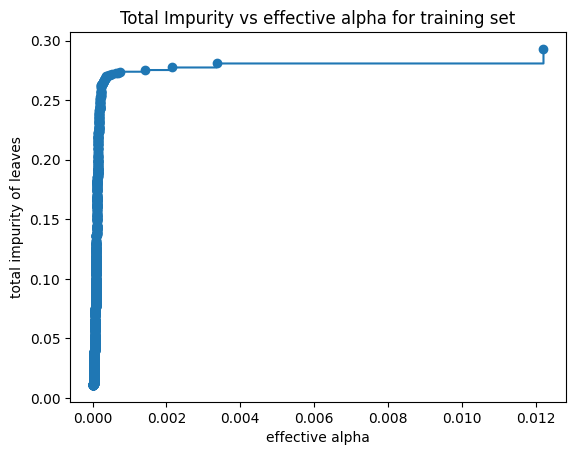

In [59]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [60]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train_support, y_train_support)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.052102897636301826


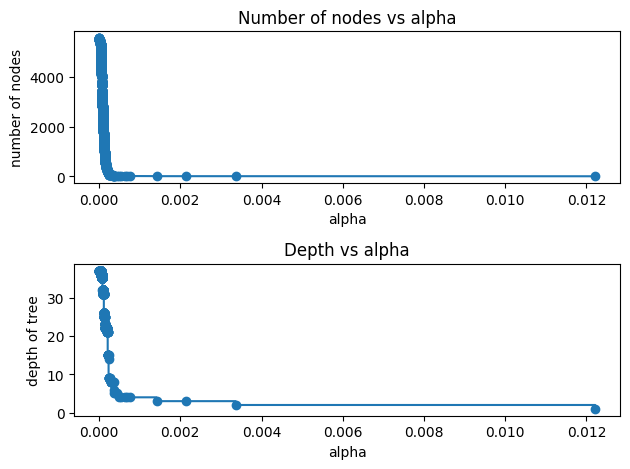

In [61]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

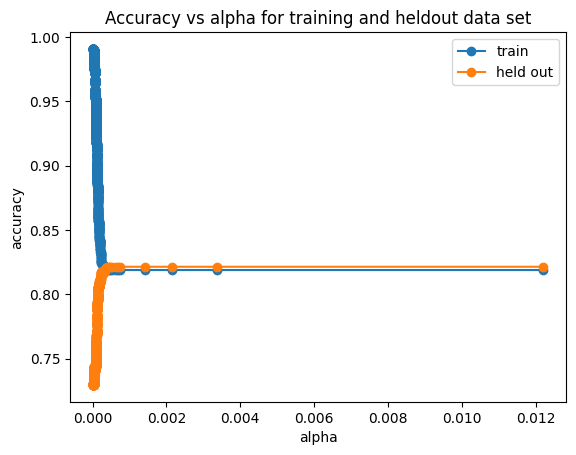

In [62]:
train_scores = [clf.score(X_train_support, y_train_support) for clf in clfs]
test_scores = [clf.score(X_test_support, y_test_support) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and heldout data set")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="held out", drawstyle="steps-post")
ax.legend()
plt.show()

In [63]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print('Training accuracy of best model: ',best_model.score(X_train_support, y_train_support))
print('Test accuracy of best model: ',best_model.score(X_test_support, y_test_support))

Training accuracy of best model:  0.8188235294117647
Test accuracy of best model:  0.8213888888888888


In [64]:
model=best_model
m, best_acc, avg_acc=k_fold_cross_validated_result(model)
print(best_acc)
print(model.ccp_alpha)

0.8241666666666667
0.0003975989092885879


In [65]:
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)
print ("training average accuracy: {0}, training best accuracy: {1},  test accuracy : {2} ".format( avg_acc, best_acc, accuracy))

training average accuracy: 0.81875, training best accuracy: 0.8241666666666667,  test accuracy : 0.8218333333333333 


In [66]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
item ={'model':'Decision Tree',
'false_positive_rate':false_positive_rate, 
'true_positive_rate':true_positive_rate, 
'roc_auc':roc_auc,
'best_train_accuracy':best_acc, 
'average_train_accuracy':avg_acc,
'test_accuracy':accuracy  }
if not isAvailableToadd(item, summary_result):    
    summary_result.append(item)

# model from kaggle

In [62]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

params = {
    'max_depth': [2, 3, 5, 6, 10, 20, 50],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params, cv=4, n_jobs=-1, verbose=1, refit='f1', scoring=['f1', 'accuracy'])

grid_search.fit(X, y)
print(grid_search.best_params_)
clf = grid_search.best_estimator_.fit(X, y)
y_pred = clf.predict(X_test)
print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('f1: {:.4f}'.format(f1_score(y_test, y_pred)))

Fitting 4 folds for each of 70 candidates, totalling 280 fits
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 100}
Accuracy: 0.7200
f1: 0.5082


# Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
min_error=1
error_rate = []
for n_estmtrs in range(1,70,5):
    for dep in range(1,15):
        rf = RandomForestClassifier(n_estimators=n_estmtrs, max_depth=dep)
        rf.fit(X_train_support,y_train_support)
        pred_i = rf.predict(X_test_support)
        error=np.mean(pred_i != y_test_support)
        error_rate.append(error)
        if min_error> error:
            min_error=error

        if error == min_error :
            print("n_estmtrs: {0}, depth : {1}, error: {2} : ".format(n_estmtrs, dep, min_error))

print(min_error)

n_estmtrs: 1, depth : 1, error: 0.21944444444444444 : 
n_estmtrs: 1, depth : 2, error: 0.20916666666666667 : 
n_estmtrs: 1, depth : 3, error: 0.18055555555555555 : 
n_estmtrs: 6, depth : 2, error: 0.18 : 
n_estmtrs: 6, depth : 7, error: 0.1786111111111111 : 
n_estmtrs: 11, depth : 8, error: 0.1763888888888889 : 
n_estmtrs: 21, depth : 5, error: 0.1761111111111111 : 
0.1761111111111111


In [84]:
print(len(error_rate))

196


Text(0, 0.5, 'Error Rate')

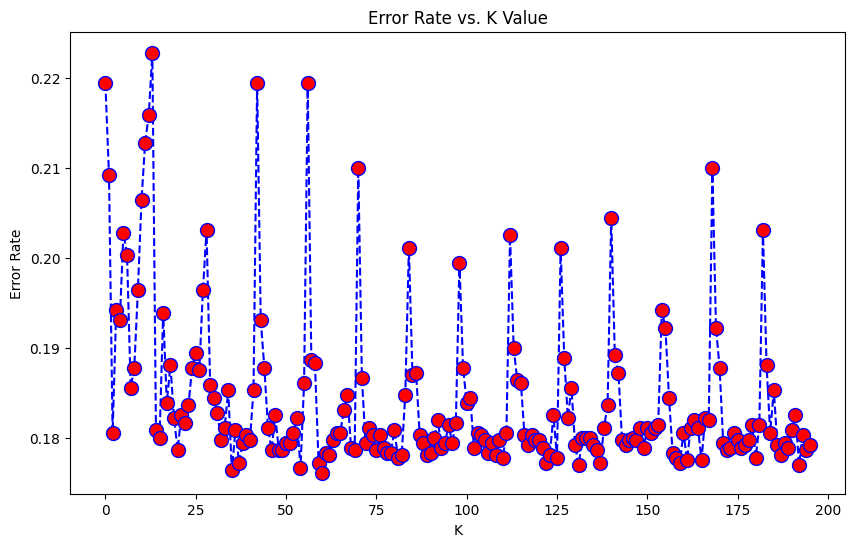

In [85]:
plt.figure(figsize=(10,6))
plt.plot(range(0,len(error_rate)),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [86]:
min_value=min(error_rate)
print(min_value)
k=0
for val in error_rate:
    if val!=min_value:
        k=k+1
    else:
        break

print("K :" + str(k))
        

0.1761111111111111
K :60


In [87]:
model=RandomForestClassifier(n_estimators=21, max_depth=5)
m, best_acc, avg_acc=k_fold_cross_validated_result(model)

In [88]:
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)
print ("training average accuracy: {0}, training best accuracy: {1},  test accuracy : {2} ".format( avg_acc, best_acc, accuracy))

training average accuracy: 0.8165833333333332, training best accuracy: 0.8208333333333333,  test accuracy : 0.8213333333333334 


In [89]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
item ={'model':'Random Forest',
'false_positive_rate':false_positive_rate, 
'true_positive_rate':true_positive_rate, 
'roc_auc':roc_auc,
'best_train_accuracy':best_acc, 
'average_train_accuracy':avg_acc,
'test_accuracy':accuracy  }
if not isAvailableToadd(item, summary_result):
    summary_result.append(item)

# K nearest neighbours

In [90]:
from sklearn.neighbors import KNeighborsClassifier

In [91]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_support,y_train_support)
    pred_i = knn.predict(X_test_support)
    error_rate.append(np.mean(pred_i != y_test_support))

Text(0, 0.5, 'Error Rate')

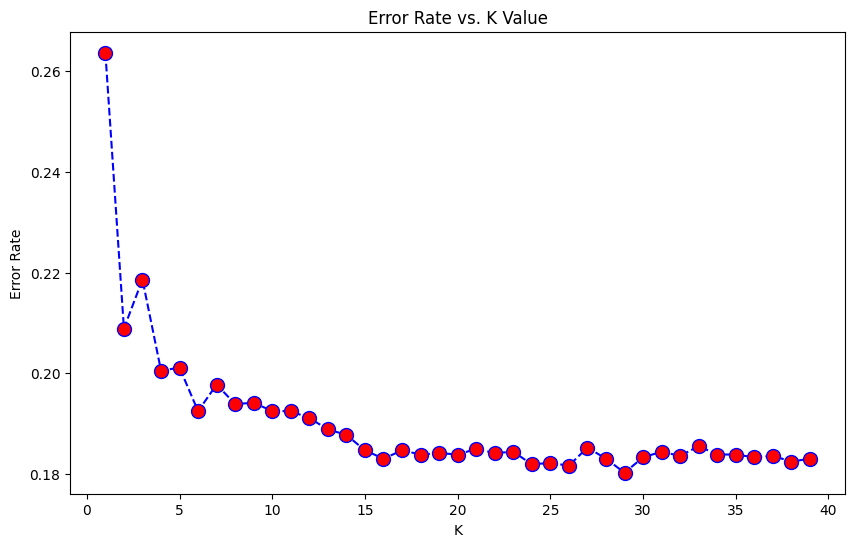

In [92]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [93]:
model=KNeighborsClassifier(n_neighbors=29)
m, best_acc, avg_acc=k_fold_cross_validated_result(model)
print(best_acc)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)
print ("training average accuracy: {0}, training best accuracy: {1},  test accuracy : {2} ".format( avg_acc, best_acc, accuracy))

0.8216666666666667
training average accuracy: 0.8147499999999999, training best accuracy: 0.8216666666666667,  test accuracy : 0.8163333333333334 


In [94]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
item ={'model':'Knn',
'false_positive_rate':false_positive_rate, 
'true_positive_rate':true_positive_rate, 
'roc_auc':roc_auc,
'best_train_accuracy':best_acc, 
'average_train_accuracy':avg_acc,
'test_accuracy':accuracy  }
if not isAvailableToadd(item, summary_result):  
    summary_result.append(item)

# Naive Bayes

In [95]:
from sklearn.naive_bayes import GaussianNB

model=GaussianNB()
m, best_acc, avg_acc=k_fold_cross_validated_result(model)
print(best_acc)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)
print ("training average accuracy: {0}, training best accuracy: {1},  test accuracy : {2} ".format( avg_acc, best_acc, accuracy))

0.689375
training average accuracy: 0.5744166666666667, training best accuracy: 0.689375,  test accuracy : 0.4135 


In [96]:
# model from kaggle 

from sklearn.naive_bayes import GaussianNB

clf = GaussianNB().fit(X, y)

y_pred = clf.predict(X_test)
print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('f1: {:.4f}'.format(f1_score(y_test, y_pred)))

Accuracy: 0.5630
f1: 0.4381


# Ada boost

In [97]:
from sklearn.ensemble import AdaBoostClassifier

In [98]:
error_rate=[]
for num_samples in range(1,50):
    model= AdaBoostClassifier(n_estimators=num_samples, random_state=0)
    model.fit(X, y)
    score=model.score(X, y)
    pred_i = model.predict(X_test_support)
    error_rate.append(np.mean(pred_i != y_test_support))
    print('number of samples: {0}, accuracy : {1}'.format(num_samples, score))

number of samples: 1, accuracy : 0.8192083333333333
number of samples: 2, accuracy : 0.8192083333333333
number of samples: 3, accuracy : 0.8192083333333333
number of samples: 4, accuracy : 0.8192083333333333
number of samples: 5, accuracy : 0.8192083333333333
number of samples: 6, accuracy : 0.8192083333333333
number of samples: 7, accuracy : 0.8195416666666666
number of samples: 8, accuracy : 0.81925
number of samples: 9, accuracy : 0.8187916666666667
number of samples: 10, accuracy : 0.81875
number of samples: 11, accuracy : 0.8168333333333333
number of samples: 12, accuracy : 0.8179583333333333
number of samples: 13, accuracy : 0.8176666666666667
number of samples: 14, accuracy : 0.8182083333333333
number of samples: 15, accuracy : 0.8180416666666667
number of samples: 16, accuracy : 0.818
number of samples: 17, accuracy : 0.8182083333333333
number of samples: 18, accuracy : 0.8182916666666666
number of samples: 19, accuracy : 0.8180833333333334
number of samples: 20, accuracy : 0.8

Text(0, 0.5, 'Error Rate')

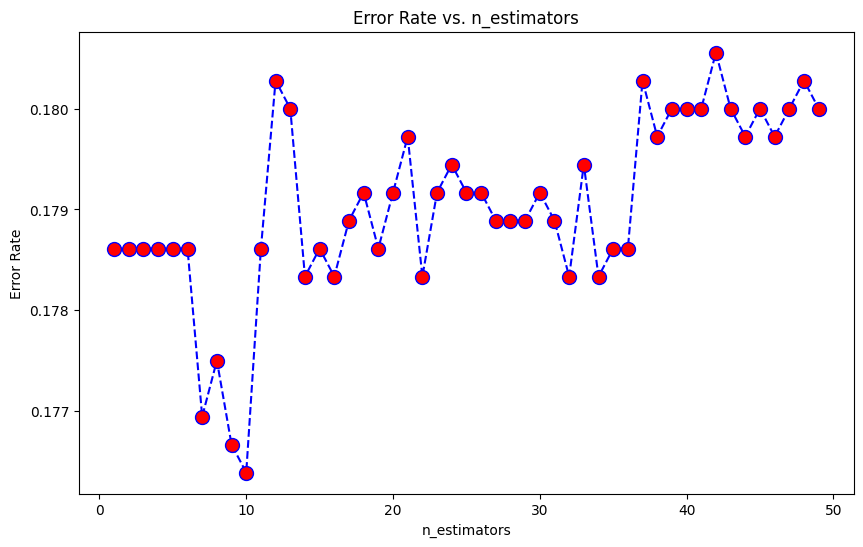

In [99]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Error Rate')

In [100]:
model= AdaBoostClassifier(n_estimators=10, random_state=0).fit(X, y)

m, best_acc, avg_acc=k_fold_cross_validated_score(model, X, y)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)
print ("training average accuracy: {0}, training best accuracy: {1},  test accuracy : {2} ".format( avg_acc, best_acc, accuracy))

training average accuracy: 0.818375, training best accuracy: 0.82625,  test accuracy : 0.8213333333333334 


In [101]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
item ={'model':'AdaBoost',
'false_positive_rate':false_positive_rate, 
'true_positive_rate':true_positive_rate, 
'roc_auc':roc_auc,
'best_train_accuracy':best_acc, 
'average_train_accuracy':avg_acc,
'test_accuracy':accuracy  }
if not isAvailableToadd(item, summary_result):
    summary_result.append(item)

# XGBoos

In [102]:
%%time
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
xgb.set_config(verbosity=0)

params = {
    'objective': ['binary:logistic'],
    'max_depth': [3, 5, 6, 10, 20],
    'n_estimators': [100, 200],
    'scale_pos_weight': [5]
}

grid_search = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=params, n_jobs=1, verbose=1, refit='f1', scoring=['f1', 'accuracy'])
grid_search.fit(X, y)
clf = grid_search.best_estimator_.fit(X, y)
print(grid_search.best_params_)
y_pred = clf.predict(X_test)
print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('f1: {:.4f}'.format(f1_score(y_test, y_pred)))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'max_depth': 5, 'n_estimators': 100, 'objective': 'binary:logistic', 'scale_pos_weight': 5}
Accuracy: 0.7073
f1: 0.4994
CPU times: user 33min 6s, sys: 32.3 s, total: 33min 38s
Wall time: 5min 43s


# ROC CURVE

In [105]:
for result in summary_result:
    print('Model:{0}, Traning Accuracy= {1}, Test Accuracy= {2}'.format(
        result['model'], result['average_train_accuracy'], result['test_accuracy'] ))

Model:Logistic Regression, Traning Accuracy= 0.8083750000000001, Test Accuracy= 0.8098333333333333
Model:Linear Perceptron, Traning Accuracy= 0.7822916666666666, Test Accuracy= 0.8076666666666666
Model:Support Vector machine, Traning Accuracy= 0.8173333333333334, Test Accuracy= 0.8206666666666667
Model:Decision Tree, Traning Accuracy= 0.81875, Test Accuracy= 0.8218333333333333
Model:Random Forest, Traning Accuracy= 0.8165833333333332, Test Accuracy= 0.8213333333333334
Model:Knn, Traning Accuracy= 0.8147499999999999, Test Accuracy= 0.8163333333333334
Model:AdaBoost, Traning Accuracy= 0.818375, Test Accuracy= 0.8213333333333334


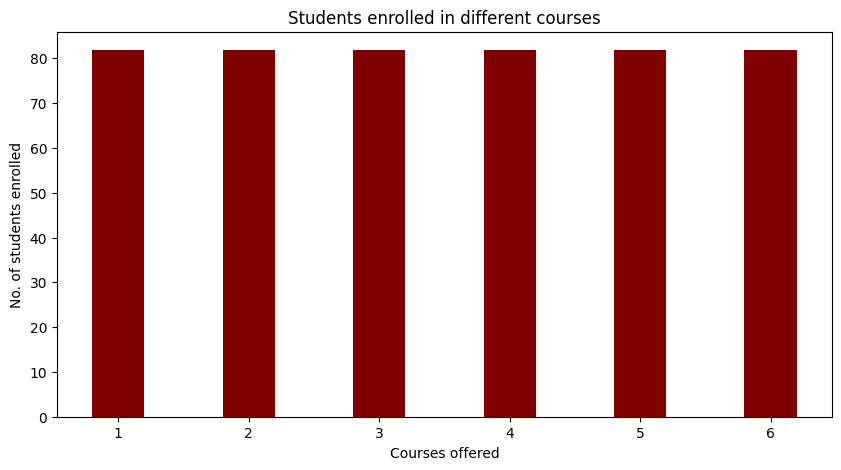

In [108]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(range(1,7), result['average_train_accuracy']*100, color ='maroon',
        width = 0.4)
 
plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()